## KERAS REGRESSION
Predicting price of a house using a ANN

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
cd 'Courses/Python4DataScience/Refactored_Py_DS_ML_Bootcamp-master/22-Deep-Learning/TensorFlow_FILES/DATA/'

/Users/andreabocincova/Desktop/Courses/Python4DataScience/Refactored_Py_DS_ML_Bootcamp-master/22-Deep-Learning/TensorFlow_FILES/DATA


In [9]:
df = pd.read_csv('kc_house_data.csv')

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.isnull().sum() # no missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


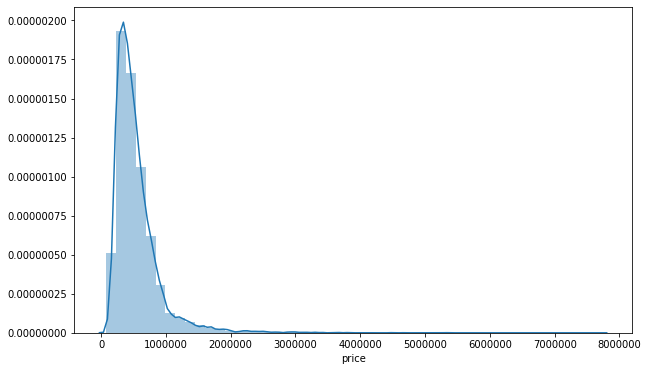

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df['price']) # check for outliers in the predicted value

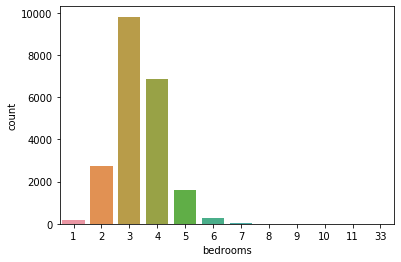

In [14]:
sns.countplot(df['bedrooms']) # there is 33 bedroom mension somewhere

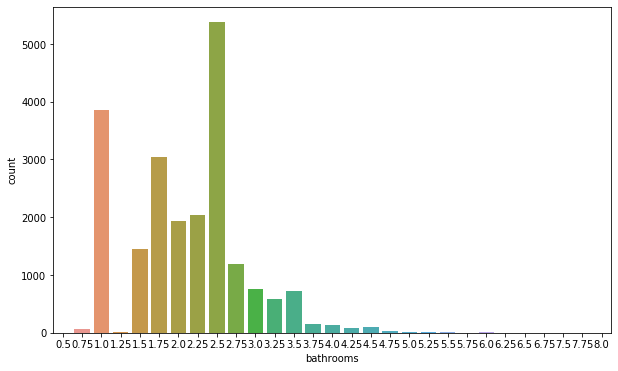

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(df['bathrooms'])

In [16]:
df.corr()['price'].sort_values() # check correlations with predicted label

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

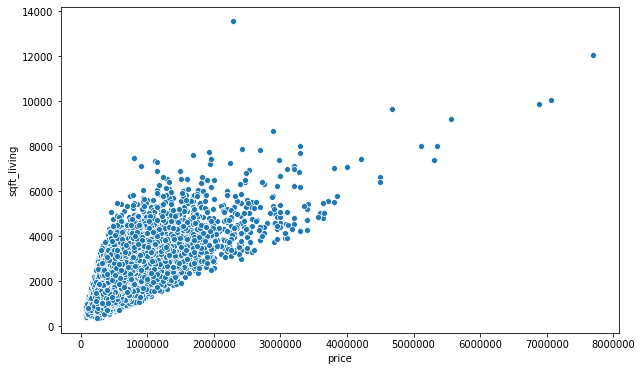

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data= df)

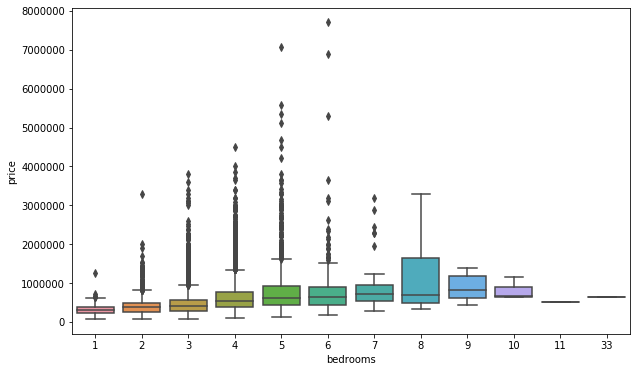

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

In [19]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

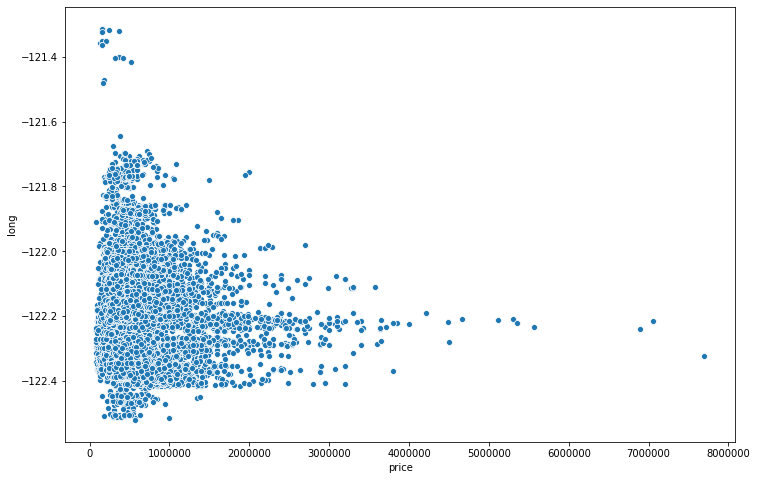

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

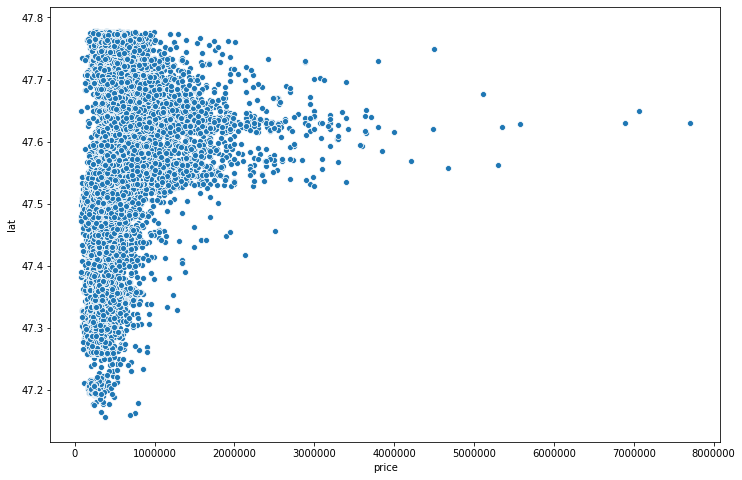

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

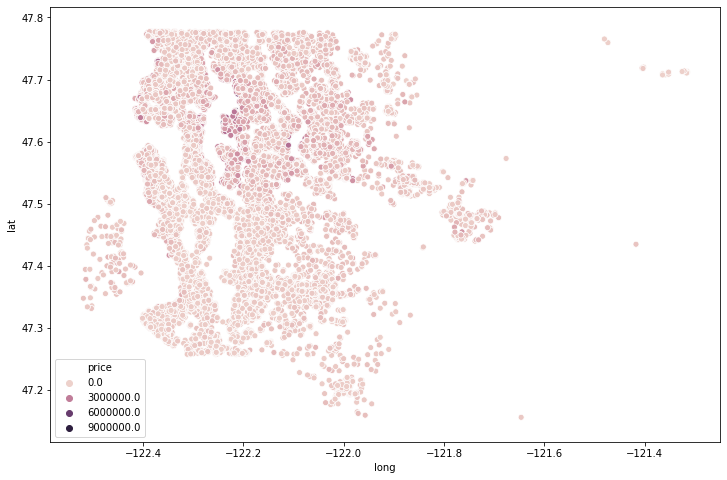

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [28]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [29]:
# remove 1% of the most pricey houses
one_percent = round(len(df)*0.01)
bottom99percent = df.sort_values('price',ascending=False).iloc[one_percent:]

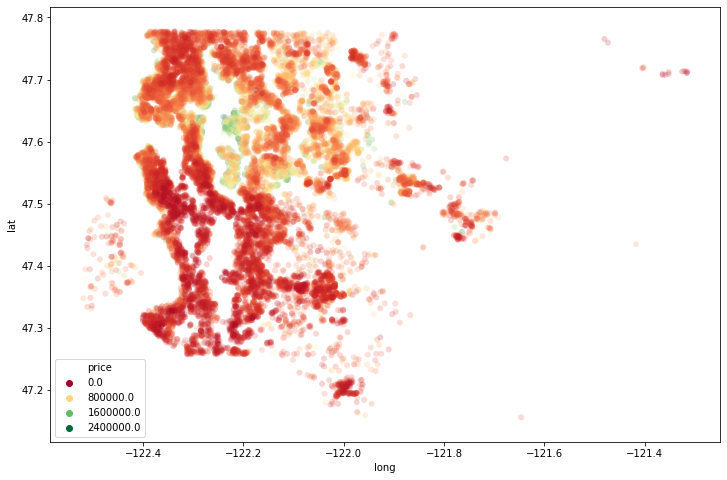

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=bottom99percent,edgecolor= 'None', alpha = 0.2, palette='RdYlGn', hue='price')

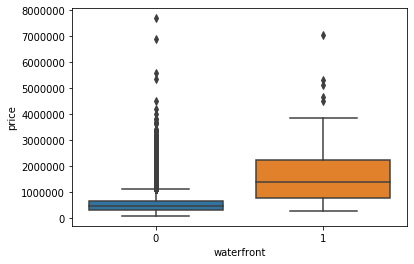

In [34]:
sns.boxplot(x='waterfront',y= 'price', data= df)

In [35]:
# feature engineering (drop unnecessary features, generate new one)

In [36]:
df = df.drop('id',axis = 1)

In [38]:
df['date'] = pd.to_datetime(df['date']) # change date to a date object

In [40]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

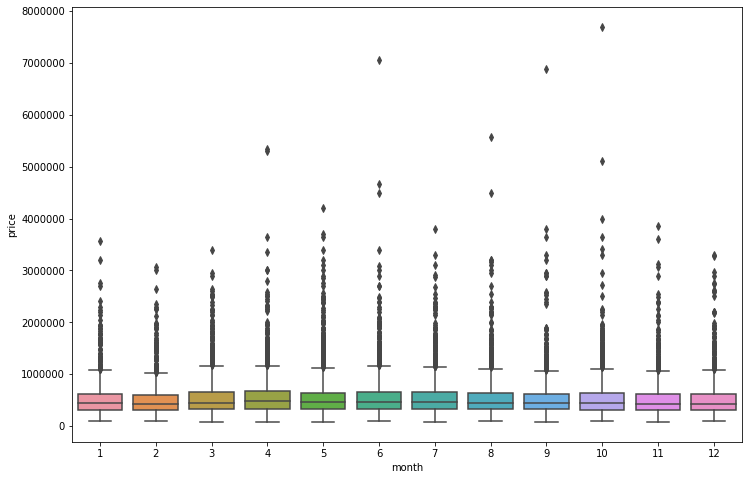

In [43]:
# are these useful?
plt.figure(figsize=(12,8))
sns.boxplot(x = 'month',y = 'price', data = df)

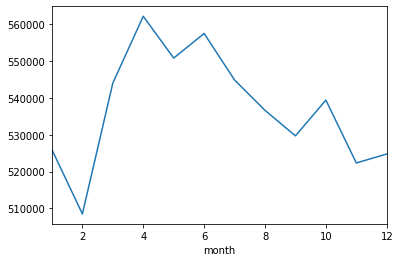

In [46]:
df.groupby('month').mean()['price'].plot()

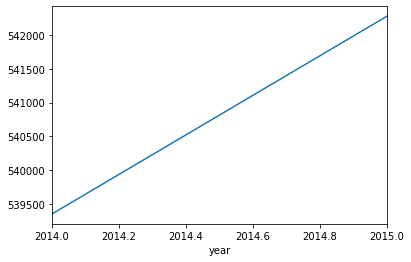

In [47]:
df.groupby('year').mean()['price'].plot()

In [48]:
df = df.drop('date',axis = 1)

In [49]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [50]:
# zipcode is currently considered as numerical- should be change to categorical?
df['zipcode'].value_counts() # too many groups to dummy code in an easy way, could be recoded based on a map (skip for now)

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [51]:
df = df.drop('zipcode', axis = 1)

In [53]:
df['yr_renovated'].value_counts() # dummy code as whether renovated or not but renovation year might actually correlate with value of the house

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

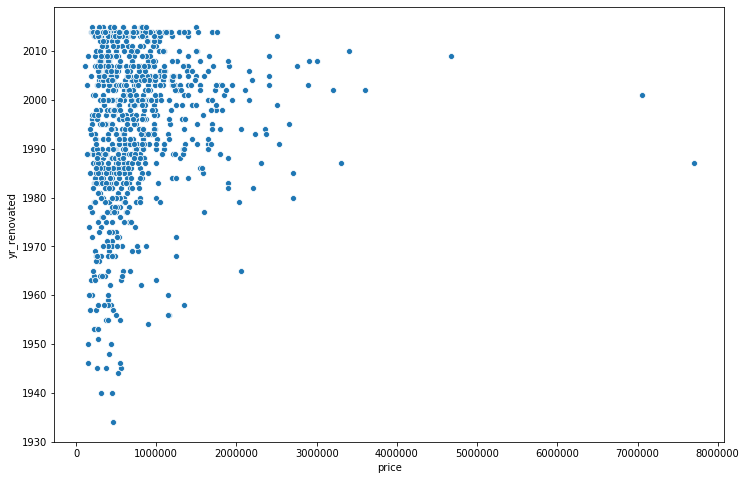

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'price',y = 'yr_renovated', data = df[df['yr_renovated']>1])

In [57]:
# same situation with sqft_basement

In [59]:
# REGRESSION

In [62]:
# separate labels from features
X = df.drop('price', axis = 1).values
y = df['price'].values

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
# scale features (perform scaling only on the training set !!! to prevent leakage)
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train = scaler.fit_transform(X_train) # scaled

In [69]:
X_test = scaler.transform(X_test) # scaled

In [72]:
# create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
X_train.shape

(15117, 19)

In [77]:
model = Sequential()  # initialize model

# add layers and their activation functions
model.add(Dense(19,activation = 'relu'))  # rectified linear unit
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))

model.add(Dense(1)) # output layer
model.compile(optimizer='adam',loss = 'mse')

In [78]:
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), batch_size = 128, epochs = 400) 
# it uses validation data to check the model but does not use to adjust to weights so no double dipping
# smaller batch size increases run time but decreases chances of overfitting

Epoch 1/400
119/119 [==============================] - 1s 6ms/step - loss: 428404314658.1334 - val_loss: 418840903680.0000
Epoch 2/400
119/119 [==============================] - 0s 922us/step - loss: 438455832029.8666 - val_loss: 411343683584.0000
Epoch 3/400
119/119 [==============================] - 0s 910us/step - loss: 407870695833.6000 - val_loss: 346285768704.0000
Epoch 4/400
119/119 [==============================] - 0s 922us/step - loss: 329482526993.0667 - val_loss: 174936670208.0000
Epoch 5/400
119/119 [==============================] - 0s 917us/step - loss: 145439875003.7333 - val_loss: 94947819520.0000
Epoch 6/400
119/119 [==============================] - 0s 930us/step - loss: 107760455475.2000 - val_loss: 92615213056.0000
Epoch 7/400
119/119 [==============================] - 0s 923us/step - loss: 88692349132.8000 - val_loss: 90826096640.0000
Epoch 8/400
119/119 [==============================] - 0s 920us/step - loss: 91934468437.3333 - val_loss: 88856985600.0000
Epoch 9/

119/119 [==============================] - 0s 1000us/step - loss: 39283892172.8000 - val_loss: 35293683712.0000
Epoch 68/400
119/119 [==============================] - 0s 976us/step - loss: 36095901303.4667 - val_loss: 35139502080.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 39626789478.4000 - val_loss: 34994536448.0000
Epoch 70/400
119/119 [==============================] - 0s 986us/step - loss: 37272899447.4667 - val_loss: 34891202560.0000
Epoch 71/400
119/119 [==============================] - 0s 967us/step - loss: 34645126638.9333 - val_loss: 34738737152.0000
Epoch 72/400
119/119 [==============================] - 0s 971us/step - loss: 36254838323.2000 - val_loss: 34626437120.0000
Epoch 73/400
119/119 [==============================] - 0s 993us/step - loss: 33992198451.2000 - val_loss: 34511106048.0000
Epoch 74/400
119/119 [==============================] - 0s 989us/step - loss: 35108937216.0000 - val_loss: 34385543168.0000
Epoch 75/400
119/119 [

119/119 [==============================] - 0s 969us/step - loss: 33630522521.6000 - val_loss: 31029481472.0000
Epoch 134/400
119/119 [==============================] - 0s 965us/step - loss: 33447625454.9333 - val_loss: 30854287360.0000
Epoch 135/400
119/119 [==============================] - 0s 984us/step - loss: 33866015948.8000 - val_loss: 30799790080.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 34117427029.3333 - val_loss: 30823510016.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 30587276953.6000 - val_loss: 30768009216.0000
Epoch 138/400
119/119 [==============================] - 0s 967us/step - loss: 33810407543.4667 - val_loss: 30785150976.0000
Epoch 139/400
119/119 [==============================] - 0s 971us/step - loss: 32447380002.1333 - val_loss: 30694699008.0000
Epoch 140/400
119/119 [==============================] - 0s 954us/step - loss: 33054598417.0667 - val_loss: 30662410240.0000
Epoch 141/400
119/

Epoch 199/400
119/119 [==============================] - 0s 954us/step - loss: 30253887624.5333 - val_loss: 29170530304.0000
Epoch 200/400
119/119 [==============================] - 0s 983us/step - loss: 31948661196.8000 - val_loss: 29130420224.0000
Epoch 201/400
119/119 [==============================] - 0s 986us/step - loss: 30552885077.3333 - val_loss: 29116260352.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 29692592520.5333 - val_loss: 29195069440.0000
Epoch 203/400
119/119 [==============================] - 0s 981us/step - loss: 31396797457.0667 - val_loss: 29106081792.0000
Epoch 204/400
119/119 [==============================] - 0s 972us/step - loss: 31281650176.0000 - val_loss: 29127245824.0000
Epoch 205/400
119/119 [==============================] - 0s 988us/step - loss: 31330266931.2000 - val_loss: 29085028352.0000
Epoch 206/400
119/119 [==============================] - 0s 983us/step - loss: 31217322205.8667 - val_loss: 29046073344.0000
Ep

Epoch 265/400
119/119 [==============================] - 0s 977us/step - loss: 31021385062.4000 - val_loss: 28078290944.0000
Epoch 266/400
119/119 [==============================] - 0s 1ms/step - loss: 30401670314.6667 - val_loss: 28067850240.0000
Epoch 267/400
119/119 [==============================] - 0s 1ms/step - loss: 30007985749.3333 - val_loss: 28016785408.0000
Epoch 268/400
119/119 [==============================] - 0s 961us/step - loss: 31034773265.0667 - val_loss: 28004263936.0000
Epoch 269/400
119/119 [==============================] - 0s 968us/step - loss: 30307904887.4667 - val_loss: 27970228224.0000
Epoch 270/400
119/119 [==============================] - 0s 959us/step - loss: 29637412352.0000 - val_loss: 27962044416.0000
Epoch 271/400
119/119 [==============================] - 0s 958us/step - loss: 30721828864.0000 - val_loss: 28002613248.0000
Epoch 272/400
119/119 [==============================] - 0s 961us/step - loss: 30655484074.6667 - val_loss: 27948376064.0000
Epoc

Epoch 331/400
119/119 [==============================] - 0s 950us/step - loss: 30915015150.9333 - val_loss: 27095099392.0000
Epoch 332/400
119/119 [==============================] - 0s 955us/step - loss: 29076298606.9333 - val_loss: 27031410688.0000
Epoch 333/400
119/119 [==============================] - 0s 1ms/step - loss: 28909409280.0000 - val_loss: 27080906752.0000
Epoch 334/400
119/119 [==============================] - 0s 954us/step - loss: 30602177450.6667 - val_loss: 27105009664.0000
Epoch 335/400
119/119 [==============================] - 0s 970us/step - loss: 27611527168.0000 - val_loss: 27035615232.0000
Epoch 336/400
119/119 [==============================] - 0s 933us/step - loss: 27703009638.4000 - val_loss: 27068446720.0000
Epoch 337/400
119/119 [==============================] - 0s 957us/step - loss: 29277106483.2000 - val_loss: 27263404032.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 29656293341.8667 - val_loss: 26984525824.0000
Epoc

Epoch 397/400
119/119 [==============================] - 0s 951us/step - loss: 29886321169.0667 - val_loss: 26030950400.0000
Epoch 398/400
119/119 [==============================] - 0s 1ms/step - loss: 32075274683.7333 - val_loss: 26007957504.0000
Epoch 399/400
119/119 [==============================] - 0s 952us/step - loss: 27574040132.2667 - val_loss: 25950676992.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 28534730052.2667 - val_loss: 25937768448.0000


In [79]:
# EVALUATE THE MODEL

In [82]:
# explore model history
losses = pd.DataFrame(model.history.history)

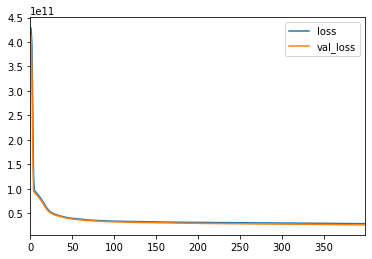

In [83]:
losses.plot() # look for deacrease for both train and validation data - otherwise overfitting is occuring

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [85]:
predictions = model.predict(X_test)

In [87]:
mean_squared_error(y_test,predictions)**.5

161052.0705911758

In [88]:
mean_absolute_error(y_test,predictions) # is this good? check the descriptive stats on the original data

99336.59821084105

In [91]:
df['price'].describe() # error is ~ 20% of the price 

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [92]:
explained_variance_score(y_test,predictions) # 1.0 is a perfect score

0.80441509041867

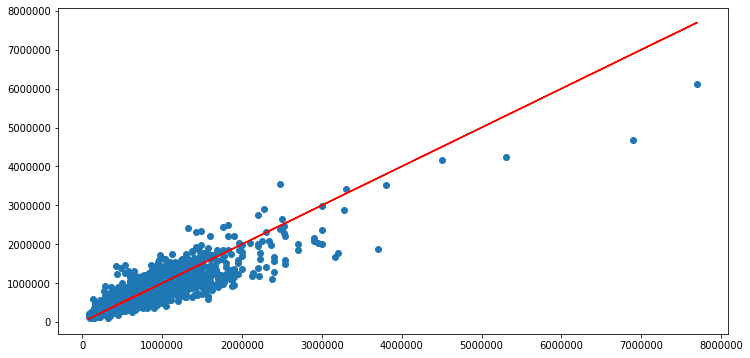

In [95]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r') # are outliers influencing our performance too much --> retrain on the bottom 99%

In [96]:
# PREDICT A BRAND NEW HOUSE

In [99]:
single_house = df.drop('price', axis = 1).iloc[0]

In [101]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [126]:
predicted_price = model.predict(single_house)[0][0]
actual_price =  df.head(1)['price'].values[0]

In [128]:
print('Actual price ' + str(actual_price), ', predicted_price:' + str(predicted_price))

Actual price 221900.0 , predicted_price:276989.62
